In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10.0, 7.0))

In [3]:
report_all = pd.read_csv("../report2.csv", sep = "," , decimal=".")
report = report_all[report_all["exceptions"] != True]

In [4]:
def remove_outliers(group):
    Q1 = group['time'].quantile(0.25)
    Q3 = group['time'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definisci i limiti inferiori e superiori per identificare gli outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return group[(group['time'] >= lower_bound) & (group['time'] <= upper_bound)]

# Raggruppa per 'heuristic' e applica la funzione di rimozione degli outlier
df_no_outliers = report.groupby('heuristic').apply(remove_outliers)
df_no_outliers



heuristic  points  jaccard_index       time  exceptions
heuristic                                                                   
CuttingEdges 481  CuttingEdges      15       0.895027   135760.0       False
             482  CuttingEdges      20       0.879990   284495.0       False
             483  CuttingEdges      25       0.936451   278539.0       False
             484  CuttingEdges      30       0.860916   221128.0       False
             485  CuttingEdges      35       0.957049   382160.0       False
...                        ...     ...            ...        ...         ...
LessArea     596      LessArea      10       0.782697  4487244.0       False
             597      LessArea      15       0.726093  1757791.0       False
             598      LessArea      20       0.709550  4937838.0       False
             599      LessArea      25       0.170978  3569894.0       False
             600      LessArea      30       0.000000  5780201.0       False

[673 rows x 5 columns]

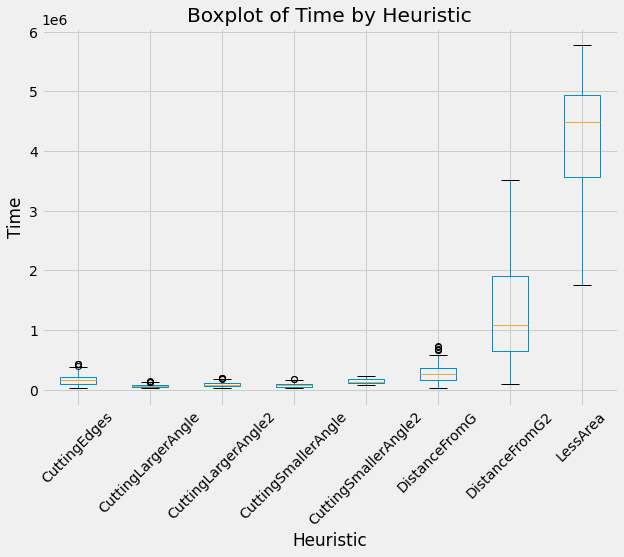

In [7]:
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.boxplot(column='time', by='heuristic', grid=False)
plt.title('Boxplot of Time by Heuristic')
plt.suptitle('')  # Remove the default title to clean up the plot
plt.xlabel('Heuristic')
plt.grid(True)
plt.ylabel('Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('../media/bxplt_time.pdf')
plt.show()

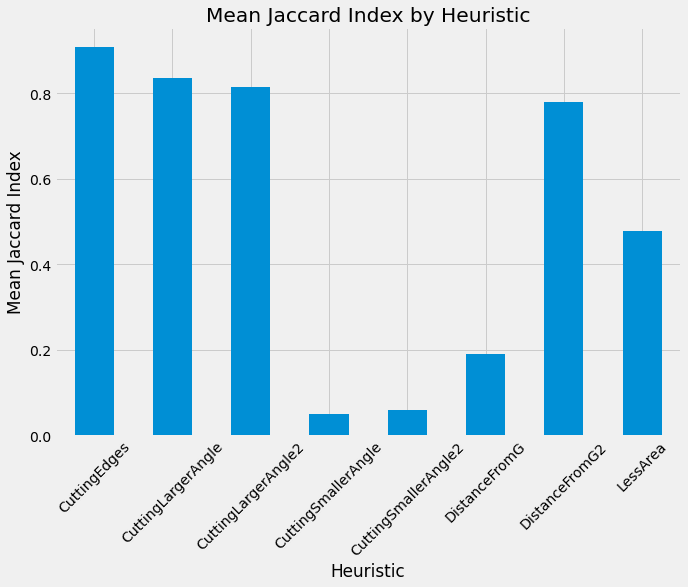

In [8]:
mean_jaccard_index = df_no_outliers.groupby('heuristic')['jaccard_index'].mean()

# Create the bar plot
mean_jaccard_index.plot.bar(title='Mean Jaccard Index by Heuristic')
plt.xlabel('Heuristic')
plt.ylabel('Mean Jaccard Index')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('../media/hist_jaccard.pdf')
plt.show()

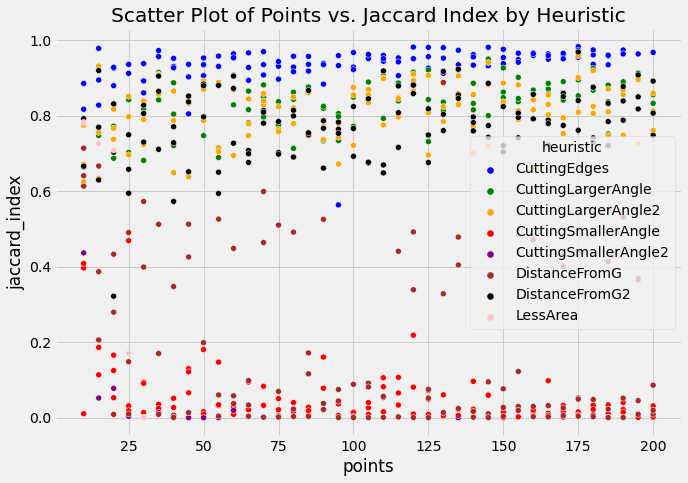

In [9]:
# plot, for each jump of point number the respective time and accuracy
CE = report[report["heuristic"] == "CuttingEdges"]
CLA = report[report["heuristic"] == "CuttingLargerAngle"]
CLA2 = report[report["heuristic"] == "CuttingLargerAngle2"]
CSA = report[report["heuristic"] == "CuttingSmallerAngle"]
CSA2 = report[report["heuristic"] == "CuttingSmallerAngle2"]
DFG = report[report["heuristic"] == "DistanceFromG"]
DFG2 = report[report["heuristic"] == "DistanceFromG2"]
LA = report[report["heuristic"] == "LessArea"]
combined_df = pd.concat([CE, CLA, CLA2, CSA, CSA2, DFG, DFG2, LA])


import seaborn as sns

# Assign a color to each heuristic
color_map = {'CuttingEdges': 'blue', 
             'CuttingLargerAngle': 'green',
             'CuttingLargerAngle2': 'orange', 
             'CuttingSmallerAngle': 'red',
             'CuttingSmallerAngle2': 'purple', 
             'DistanceFromG': 'brown',
             'DistanceFromG2': 'black', 
             'LessArea': 'pink'}

sns.scatterplot(x='points', y='jaccard_index', hue='heuristic', data=combined_df, palette = color_map)
plt.title('Scatter Plot of Points vs. Jaccard Index by Heuristic')
plt.savefig('../media/scatter_jaccard.pdf')
plt.show()

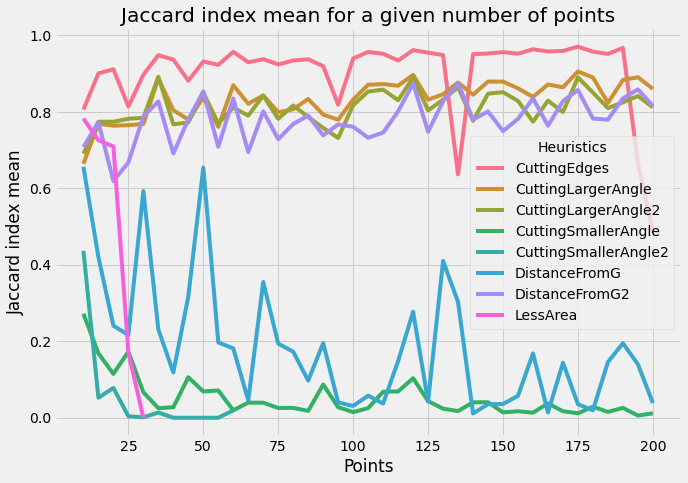

In [10]:
# Raggruppa e calcola le medie
grouped_df = combined_df.groupby(['heuristic', 'points'])['jaccard_index'].mean().reset_index()

# Crea il grafico a linee
sns.lineplot(data=grouped_df, x = 'points', y = 'jaccard_index', hue = 'heuristic')
plt.title('Jaccard index mean for a given number of points')
plt.xlabel('Points')
plt.ylabel('Jaccard index mean')
plt.legend(title = 'Heuristics')
plt.savefig('../media/plt_jaccard.pdf')
plt.show()

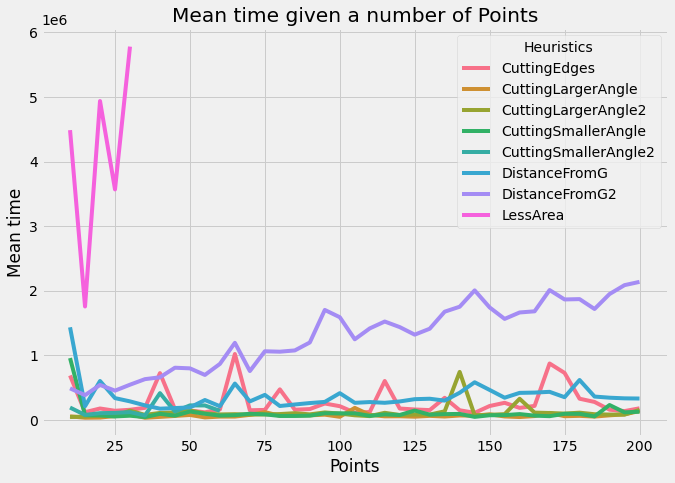

In [11]:
grouped_df = combined_df.groupby(['heuristic', 'points'])['time'].mean().reset_index()

# Crea il grafico a linee
sns.lineplot(data=grouped_df, x='points', y='time', hue='heuristic')
plt.title('Mean time given a number of Points')
plt.xlabel('Points')
plt.ylabel('Mean time')
plt.legend(title = 'Heuristics')
plt.savefig('../media/plt_time.pdf')
plt.show()